In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('고객데이테수정.csv')

In [3]:
df.head()

,연번,이름 (Name),생년월일 (Date of Birth),성별 (Gender),휴대폰번호 (Phone Number),이메일 (Email),주소 (Address),아이디 (User ID),가입일 (Registration Date),고객 세그먼트 (Customer Segment),차량구분(vehicle types),구매한 제품 (Purchased Product),제품 구매 날짜 (Purchase Date),거래 금액 (Transaction Amount),거래 방식 (Transaction Method),제품 구매 빈도 (Purchase Frequency),제품 구매 경로 (Purchase Path),연령대,제품 출시년월 (Launch Date)
0,1,강주온,2002-03-04,남,010-6502-8753,janisi@himedia.co.kr,인천광역시 남동구 구월동 88-10,14798,2023-04-01,일반,준중형 세단,Avante (CN7 N),2024-04-04,35170000,카드,1,오프라인,23,2020-05
1,2,김경수,1983-01-02,남,010-1111-2222,kimkyoungsoo31@himedia.co.kr,광주광역시 서구 치평동 14-7,kyoungsoo031,2025-02-09,vip,준대형 세단,G80 (RG3),2025-02-10,85790000,카드,5,오프라인,42,2020-03
2,3,김다은,1999-05-02,여,010-6789-0123,kimdaeun26@himedia.co.kr,부산광역시 해운대구 우동 101-12,daeun026,2025-02-28,신규,중형 suv,NEXO (FE),2025-03-10,69500000,현금,1,오프라인,26,2018-01
3,4,김민수,1960-07-01,남,010-1234-5678,kimminsu1@himedia.co.kr,전라남도 목포시 부주동 77-8,minsu001,2023-04-28,일반,중형 suv,Santa-Fe ™,2023-05-01,34920000,현금,1,오프라인,65,2018-01
4,5,김승현,1970-03-02,남,010-0123-4567,kimseunghyun20@himedia.co.kr,경기도 수원시 영통구 원천동 12-34,seunghyun020,2023-09-18,이탈가능,중형 세단,G70 (IK),2023-10-01,50230000,카드,1,오프라인,55,2017-09


In [4]:
df['고객 세그먼트 (Customer Segment)'].value_counts()

고객 세그먼트 (Customer Segment)
일반      110
신규       66
vip      61
이탈가능     55
Name: count, dtype: int64

In [5]:
# 가입일 컬럼을 datetime 형식으로 변환
df['가입일 (Registration Date)'] = pd.to_datetime(df['가입일 (Registration Date)'], format='%Y-%m-%d')

# 고객 세그먼트가 'vip' 또는 '이탈가능'인 경우는 그대로 두고,
# 가입일이 2025년 이후인 사람은 '신규'로, 그 이전은 '일반'으로 분류
df['고객 세그먼트 (Customer Segment)'] = df.apply(
    lambda row: '신규' if row['가입일 (Registration Date)'] >= pd.to_datetime('2025-01-01') and row['고객 세그먼트 (Customer Segment)'] not in ['vip', '이탈가능'] 
    else row['고객 세그먼트 (Customer Segment)'], axis=1
)

In [6]:
df

,연번,이름 (Name),생년월일 (Date of Birth),성별 (Gender),휴대폰번호 (Phone Number),이메일 (Email),주소 (Address),아이디 (User ID),가입일 (Registration Date),고객 세그먼트 (Customer Segment),차량구분(vehicle types),구매한 제품 (Purchased Product),제품 구매 날짜 (Purchase Date),거래 금액 (Transaction Amount),거래 방식 (Transaction Method),제품 구매 빈도 (Purchase Frequency),제품 구매 경로 (Purchase Path),연령대,제품 출시년월 (Launch Date)
0,1,강주온,2002-03-04,남,010-6502-8753,janisi@himedia.co.kr,인천광역시 남동구 구월동 88-10,14798,2023-04-01,일반,준중형 세단,Avante (CN7 N),2024-04-04,35170000,카드,1,오프라인,23,2020-05
1,2,김경수,1983-01-02,남,010-1111-2222,kimkyoungsoo31@himedia.co.kr,광주광역시 서구 치평동 14-7,kyoungsoo031,2025-02-09,vip,준대형 세단,G80 (RG3),2025-02-10,85790000,카드,5,오프라인,42,2020-03
2,3,김다은,1999-05-02,여,010-6789-0123,kimdaeun26@himedia.co.kr,부산광역시 해운대구 우동 101-12,daeun026,2025-02-28,신규,중형 suv,NEXO (FE),2025-03-10,69500000,현금,1,오프라인,26,2018-01
3,4,김민수,1960-07-01,남,010-1234-5678,kimminsu1@himedia.co.kr,전라남도 목포시 부주동 77-8,minsu001,2023-04-28,일반,중형 suv,Santa-Fe ™,2023-05-01,34920000,현금,1,오프라인,65,2018-01
4,5,김승현,1970-03-02,남,010-0123-4567,kimseunghyun20@himedia.co.kr,경기도 수원시 영통구 원천동 12-34,seunghyun020,2023-09-18,이탈가능,중형 세단,G70 (IK),2023-10-01,50230000,카드,1,오프라인,55,2017-09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,288,신시우,1958-07-11,여,042-207-6955,gyeonghyi78@gmail.com,전라북도 전주시 완산구 덕진동 33-7,jihungim,2023-03-06,신규,준중형 세단,G80 (RG3),2024-12-20,86770000,카드,2,온라인,67,2020-03
288,289,최춘자,1976-06-27,여,031-170-7739,hancunja@yu.kr,충청남도 천안시 동남구 성성동 22-3,jinho50,2024-08-26,신규,준대형 세단,Avante (CN7 N),2023-08-24,69510000,현금,3,오프라인,49,2020-05
289,290,차서준,1968-01-22,여,064-741-3740,qgim@simryujo.com,경상남도 창원시 의창구 봉곡동 48-6,jihun41,2023-01-02,vip,준대형 세단,NEXO (FE),2024-01-12,39890000,현금,2,온라인,57,2018-01
290,291,안정희,1984-01-10,남,051-406-1803,donghyeonbae@joyunson.com,대구광역시 수성구 범어동 55-3,yeongil47,2023-04-08,신규,소형 해치백,G80 (RG3),2024-01-30,44530000,현금,2,온라인,41,2020-03


In [7]:
df['고객 세그먼트 (Customer Segment)'].value_counts()

고객 세그먼트 (Customer Segment)
일반      104
신규       72
vip      61
이탈가능     55
Name: count, dtype: int64

In [8]:
#신규의 가입일 확인
df[df['고객 세그먼트 (Customer Segment)']=='신규']['가입일 (Registration Date)']

2     2025-02-28
7     2025-12-01
9     2024-04-01
16    2024-09-18
23    2025-01-01
         ...    
276   2024-02-18
282   2022-03-31
287   2023-03-06
288   2024-08-26
290   2023-04-08
Name: 가입일 (Registration Date), Length: 72, dtype: datetime64[ns]

In [9]:
#컬럼 데이터 타입 확인
df.dtypes

연번                                        int64
이름 (Name)                                object
생년월일 (Date of Birth)                     object
성별 (Gender)                              object
휴대폰번호 (Phone Number)                     object
이메일 (Email)                              object
주소 (Address)                             object
아이디 (User ID)                            object
가입일 (Registration Date)          datetime64[ns]
고객 세그먼트 (Customer Segment)               object
차량구분(vehicle types)                      object
구매한 제품 (Purchased Product)               object
제품 구매 날짜 (Purchase Date)                 object
거래 금액 (Transaction Amount)                int64
거래 방식 (Transaction Method)               object
제품 구매 빈도 (Purchase Frequency)             int64
제품 구매 경로 (Purchase Path)                 object
연령대                                       int64
제품 출시년월 (Launch Date)                    object
dtype: object

In [10]:
#연령대 > 연령으로 컬럼수정
df['연령'] = df['연령대']


In [11]:
#연번 제외
df.drop(['연번'], axis=1, inplace=True)
df.drop(['연령대'], axis=1, inplace=True)

In [12]:
df.head()

,이름 (Name),생년월일 (Date of Birth),성별 (Gender),휴대폰번호 (Phone Number),이메일 (Email),주소 (Address),아이디 (User ID),가입일 (Registration Date),고객 세그먼트 (Customer Segment),차량구분(vehicle types),구매한 제품 (Purchased Product),제품 구매 날짜 (Purchase Date),거래 금액 (Transaction Amount),거래 방식 (Transaction Method),제품 구매 빈도 (Purchase Frequency),제품 구매 경로 (Purchase Path),제품 출시년월 (Launch Date),연령
0,강주온,2002-03-04,남,010-6502-8753,janisi@himedia.co.kr,인천광역시 남동구 구월동 88-10,14798,2023-04-01,일반,준중형 세단,Avante (CN7 N),2024-04-04,35170000,카드,1,오프라인,2020-05,23
1,김경수,1983-01-02,남,010-1111-2222,kimkyoungsoo31@himedia.co.kr,광주광역시 서구 치평동 14-7,kyoungsoo031,2025-02-09,vip,준대형 세단,G80 (RG3),2025-02-10,85790000,카드,5,오프라인,2020-03,42
2,김다은,1999-05-02,여,010-6789-0123,kimdaeun26@himedia.co.kr,부산광역시 해운대구 우동 101-12,daeun026,2025-02-28,신규,중형 suv,NEXO (FE),2025-03-10,69500000,현금,1,오프라인,2018-01,26
3,김민수,1960-07-01,남,010-1234-5678,kimminsu1@himedia.co.kr,전라남도 목포시 부주동 77-8,minsu001,2023-04-28,일반,중형 suv,Santa-Fe ™,2023-05-01,34920000,현금,1,오프라인,2018-01,65
4,김승현,1970-03-02,남,010-0123-4567,kimseunghyun20@himedia.co.kr,경기도 수원시 영통구 원천동 12-34,seunghyun020,2023-09-18,이탈가능,중형 세단,G70 (IK),2023-10-01,50230000,카드,1,오프라인,2017-09,55


In [13]:
car_features=["성별 (Gender)","차량구분(vehicle types)","거래 방식 (Transaction Method)","제품 출시년월 (Launch Date)","제품 구매 날짜 (Purchase Date)","고객 세그먼트 (Customer Segment)"]
num_features=["연령","거래 금액 (Transaction Amount)","제품 구매 빈도 (Purchase Frequency)"]

In [14]:
#클러스터링
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.compose import ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), car_features)
    ])



In [15]:
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('kmeans', KMeans(random_state=42))
])

In [16]:
def calculate_wcss(pipeline, X, max_clusters=10):
    wcss = []
    for i in range(1, max_clusters + 1):
        pipeline.set_params(kmeans__n_clusters=i)
        pipeline.fit(X)
        wcss.append(pipeline.named_steps['kmeans'].inertia_)
    return wcss

In [17]:
X = df[num_features + car_features]


In [18]:
wcss = calculate_wcss(pipeline, X)

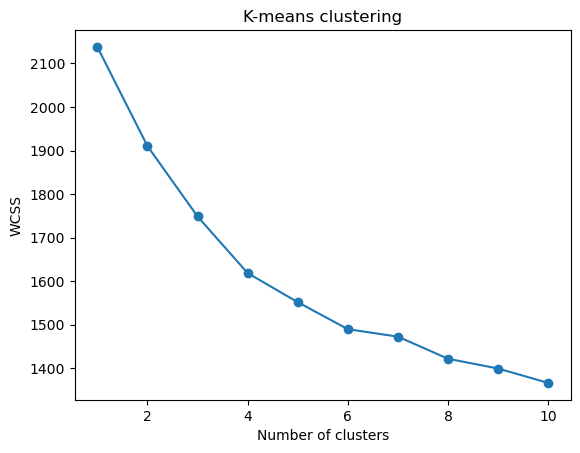

In [19]:
#엘보우 기법으로 최적의 클러스터 수 찾기
import matplotlib.pyplot as plt
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('K-means clustering')
plt.show()


In [20]:
#6개로 클러스터링
pipeline.set_params(kmeans__n_clusters=6)
pipeline.fit(X)
df['Cluster'] = pipeline.predict(X)
df['Cluster'].value_counts()

Cluster
5    61
2    57
1    51
3    43
0    41
4    39
Name: count, dtype: int64

In [21]:
df

,이름 (Name),생년월일 (Date of Birth),성별 (Gender),휴대폰번호 (Phone Number),이메일 (Email),주소 (Address),아이디 (User ID),가입일 (Registration Date),고객 세그먼트 (Customer Segment),차량구분(vehicle types),구매한 제품 (Purchased Product),제품 구매 날짜 (Purchase Date),거래 금액 (Transaction Amount),거래 방식 (Transaction Method),제품 구매 빈도 (Purchase Frequency),제품 구매 경로 (Purchase Path),제품 출시년월 (Launch Date),연령,Cluster
0,강주온,2002-03-04,남,010-6502-8753,janisi@himedia.co.kr,인천광역시 남동구 구월동 88-10,14798,2023-04-01,일반,준중형 세단,Avante (CN7 N),2024-04-04,35170000,카드,1,오프라인,2020-05,23,2
1,김경수,1983-01-02,남,010-1111-2222,kimkyoungsoo31@himedia.co.kr,광주광역시 서구 치평동 14-7,kyoungsoo031,2025-02-09,vip,준대형 세단,G80 (RG3),2025-02-10,85790000,카드,5,오프라인,2020-03,42,0
2,김다은,1999-05-02,여,010-6789-0123,kimdaeun26@himedia.co.kr,부산광역시 해운대구 우동 101-12,daeun026,2025-02-28,신규,중형 suv,NEXO (FE),2025-03-10,69500000,현금,1,오프라인,2018-01,26,3
3,김민수,1960-07-01,남,010-1234-5678,kimminsu1@himedia.co.kr,전라남도 목포시 부주동 77-8,minsu001,2023-04-28,일반,중형 suv,Santa-Fe ™,2023-05-01,34920000,현금,1,오프라인,2018-01,65,4
4,김승현,1970-03-02,남,010-0123-4567,kimseunghyun20@himedia.co.kr,경기도 수원시 영통구 원천동 12-34,seunghyun020,2023-09-18,이탈가능,중형 세단,G70 (IK),2023-10-01,50230000,카드,1,오프라인,2017-09,55,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,신시우,1958-07-11,여,042-207-6955,gyeonghyi78@gmail.com,전라북도 전주시 완산구 덕진동 33-7,jihungim,2023-03-06,신규,준중형 세단,G80 (RG3),2024-12-20,86770000,카드,2,온라인,2020-03,67,4
288,최춘자,1976-06-27,여,031-170-7739,hancunja@yu.kr,충청남도 천안시 동남구 성성동 22-3,jinho50,2024-08-26,신규,준대형 세단,Avante (CN7 N),2023-08-24,69510000,현금,3,오프라인,2020-05,49,5
289,차서준,1968-01-22,여,064-741-3740,qgim@simryujo.com,경상남도 창원시 의창구 봉곡동 48-6,jihun41,2023-01-02,vip,준대형 세단,NEXO (FE),2024-01-12,39890000,현금,2,온라인,2018-01,57,4
290,안정희,1984-01-10,남,051-406-1803,donghyeonbae@joyunson.com,대구광역시 수성구 범어동 55-3,yeongil47,2023-04-08,신규,소형 해치백,G80 (RG3),2024-01-30,44530000,현금,2,온라인,2020-03,41,2


In [22]:
df.head()

,이름 (Name),생년월일 (Date of Birth),성별 (Gender),휴대폰번호 (Phone Number),이메일 (Email),주소 (Address),아이디 (User ID),가입일 (Registration Date),고객 세그먼트 (Customer Segment),차량구분(vehicle types),구매한 제품 (Purchased Product),제품 구매 날짜 (Purchase Date),거래 금액 (Transaction Amount),거래 방식 (Transaction Method),제품 구매 빈도 (Purchase Frequency),제품 구매 경로 (Purchase Path),제품 출시년월 (Launch Date),연령,Cluster
0,강주온,2002-03-04,남,010-6502-8753,janisi@himedia.co.kr,인천광역시 남동구 구월동 88-10,14798,2023-04-01,일반,준중형 세단,Avante (CN7 N),2024-04-04,35170000,카드,1,오프라인,2020-05,23,2
1,김경수,1983-01-02,남,010-1111-2222,kimkyoungsoo31@himedia.co.kr,광주광역시 서구 치평동 14-7,kyoungsoo031,2025-02-09,vip,준대형 세단,G80 (RG3),2025-02-10,85790000,카드,5,오프라인,2020-03,42,0
2,김다은,1999-05-02,여,010-6789-0123,kimdaeun26@himedia.co.kr,부산광역시 해운대구 우동 101-12,daeun026,2025-02-28,신규,중형 suv,NEXO (FE),2025-03-10,69500000,현금,1,오프라인,2018-01,26,3
3,김민수,1960-07-01,남,010-1234-5678,kimminsu1@himedia.co.kr,전라남도 목포시 부주동 77-8,minsu001,2023-04-28,일반,중형 suv,Santa-Fe ™,2023-05-01,34920000,현금,1,오프라인,2018-01,65,4
4,김승현,1970-03-02,남,010-0123-4567,kimseunghyun20@himedia.co.kr,경기도 수원시 영통구 원천동 12-34,seunghyun020,2023-09-18,이탈가능,중형 세단,G70 (IK),2023-10-01,50230000,카드,1,오프라인,2017-09,55,4


In [23]:
#컬럼 순서
# 이름 (Name)	생년월일 (Date of Birth) , 연령, 성별 (Gender)	휴대폰번호 (Phone Number), 이메일 (Email)	주소 (Address)	아이디 (User ID)가입일 (Registration Date)	고객 세그먼트 (Customer Segment)	차량구분(vehicle types)	구매한 제품 (Purchased Product)	제품 구매 날짜 (Purchase Date)	거래 금액 (Transaction Amount)	거래 방식 (Transaction Method)	제품 구매 빈도 (Purchase Frequency)	제품 구매 경로 (Purchase Path)	연령대	제품 출시년월 (Launch Date)	Cluster 순으로
new_column_order = [
    '이름 (Name)', '생년월일 (Date of Birth)', '연령', '성별 (Gender)', '휴대폰번호 (Phone Number)', 
    '이메일 (Email)', '주소 (Address)', '아이디 (User ID)', '가입일 (Registration Date)', 
    '고객 세그먼트 (Customer Segment)', '차량구분(vehicle types)', '구매한 제품 (Purchased Product)', 
    '제품 구매 날짜 (Purchase Date)', '거래 금액 (Transaction Amount)', '거래 방식 (Transaction Method)', 
    '제품 구매 빈도 (Purchase Frequency)', '제품 구매 경로 (Purchase Path)',
    '제품 출시년월 (Launch Date)', 'Cluster'
]
df = df[new_column_order]

In [24]:
df.head()

,이름 (Name),생년월일 (Date of Birth),연령,성별 (Gender),휴대폰번호 (Phone Number),이메일 (Email),주소 (Address),아이디 (User ID),가입일 (Registration Date),고객 세그먼트 (Customer Segment),차량구분(vehicle types),구매한 제품 (Purchased Product),제품 구매 날짜 (Purchase Date),거래 금액 (Transaction Amount),거래 방식 (Transaction Method),제품 구매 빈도 (Purchase Frequency),제품 구매 경로 (Purchase Path),제품 출시년월 (Launch Date),Cluster
0,강주온,2002-03-04,23,남,010-6502-8753,janisi@himedia.co.kr,인천광역시 남동구 구월동 88-10,14798,2023-04-01,일반,준중형 세단,Avante (CN7 N),2024-04-04,35170000,카드,1,오프라인,2020-05,2
1,김경수,1983-01-02,42,남,010-1111-2222,kimkyoungsoo31@himedia.co.kr,광주광역시 서구 치평동 14-7,kyoungsoo031,2025-02-09,vip,준대형 세단,G80 (RG3),2025-02-10,85790000,카드,5,오프라인,2020-03,0
2,김다은,1999-05-02,26,여,010-6789-0123,kimdaeun26@himedia.co.kr,부산광역시 해운대구 우동 101-12,daeun026,2025-02-28,신규,중형 suv,NEXO (FE),2025-03-10,69500000,현금,1,오프라인,2018-01,3
3,김민수,1960-07-01,65,남,010-1234-5678,kimminsu1@himedia.co.kr,전라남도 목포시 부주동 77-8,minsu001,2023-04-28,일반,중형 suv,Santa-Fe ™,2023-05-01,34920000,현금,1,오프라인,2018-01,4
4,김승현,1970-03-02,55,남,010-0123-4567,kimseunghyun20@himedia.co.kr,경기도 수원시 영통구 원천동 12-34,seunghyun020,2023-09-18,이탈가능,중형 세단,G70 (IK),2023-10-01,50230000,카드,1,오프라인,2017-09,4


In [25]:
#저장
df.to_csv('클러스터링고객데이터_2.csv', index=False)

In [26]:
#모델 저장
import joblib
joblib.dump(pipeline, 'model2.pkl')


['model2.pkl']